# Install / Import library

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Connect Data

In [ ]:
from google.colab import files
upload=files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
data= pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
feature_data=data.columns
print(f'feature_data:{list(feature_data)}')

feature_data:['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [ ]:
uni_car_name = data['CarName'].unique()
print(uni_car_name)

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [ ]:
# Tạo một cột mới "CarCompany" chứa tên hãng xe
data['CarCompany'] = data['CarName'].str.split(' ').str[0]

# Hiển thị 5 dòng đầu tiên của DataFrame với cột mới
print(data[['CarName', 'CarCompany']].head())


                    CarName   CarCompany
0        alfa-romero giulia  alfa-romero
1       alfa-romero stelvio  alfa-romero
2  alfa-romero Quadrifoglio  alfa-romero
3               audi 100 ls         audi
4                audi 100ls         audi


In [ ]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
uni_carcpn=data['CarCompany'].unique()
print(uni_carcpn)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [ ]:
data.drop(columns=['CarName'],inplace=True)

In [ ]:
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
uni_doornumber= data['doornumber'].unique()
print(uni_doornumber)

['two' 'four']


In [ ]:
def class_doornumber (row):
  if 'two' in row:
    return '2'
  return '4'


In [ ]:
data['doornumber'] = data['doornumber'].apply(class_doornumber)

In [ ]:
data['doornumber']=data['doornumber'].astype(int)

In [ ]:
data.head()


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
uni_cylin=data['cylindernumber'].unique()
print(uni_cylin)

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [ ]:
def class_cylin (row):
  if 'four' in row:
    return '4'
  elif 'five' in row:
    return '5'
  elif 'three' in row:
    return '3'
  elif 'six' in row:
    return '6'
  elif 'twelve' in row:
    return '12'
  elif 'two' in row:
    return '2'
  elif 'eight' in row:
    return '8'

In [ ]:
data['cylindernumber'] = data['cylindernumber'].apply(class_cylin)
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
data['cylindernumber']=data['cylindernumber'].astype(int)

In [ ]:
data.isnull().sum()

car_ID              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
CarCompany          0
dtype: int64

In [ ]:
uni_carbody= data['carbody'].unique()
print(uni_carbody)

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


In [ ]:
uni_fueltype=data['fueltype'].unique()
print(uni_fueltype)

['gas' 'diesel']


In [ ]:
uni_dri = data['drivewheel'].unique()
print(uni_dri)

['rwd' 'fwd' '4wd']


In [ ]:
# chuẩn hoá tên gọi
data.rename(columns={'fueltype':'fuel_type','carbody':'car_body','drivewheel':'drive_Wheel','CarCompany':'Car_Company'},inplace=True)

In [ ]:
feature_data

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
# chuẩn hoá tên gọi
data.rename(columns={'wheelbase':'Wheelbase','carlength':'Car_length','carwidth':'Car_width','carheight':'Car_height','curbweight':'Curb_weight','enginetype':'Engine_type','cylindernumber':'Cylinder_number','enginesize':'Engine_size','fuelsystem':'Fuel_system','boreratio':'Bore_ratio','stroke':'Stroke','compressionratio':'Compression_ratio','horsepower':'Horse_power','peakrpm':'Peak_RPM','citympg':'City_MPG','highwaympg':'Highway_MPG','price':'Price','fuel_type':'Fuel_type','car_body':'Car_body','drive_Wheel':'Drive_Wheel','Car_Company':'Car_company','doornumber':'Door_number'},inplace=True)

In [ ]:
feature_data=data.columns
print(f'feature_data:{list(feature_data)}')

feature_data:['car_ID', 'symboling', 'Fuel_type', 'aspiration', 'Door_number', 'Car_body', 'Drive_Wheel', 'enginelocation', 'Wheelbase', 'Car_length', 'Car_width', 'Car_height', 'Curb_weight', 'Engine_type', 'Cylinder_number', 'Engine_size', 'Fuel_system', 'Bore_ratio', 'Stroke', 'Compression_ratio', 'Horse_power', 'Peak_RPM', 'City_MPG', 'Highway_MPG', 'Price', 'Car_company']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_ID             205 non-null    int64  
 1   symboling          205 non-null    int64  
 2   Fuel_type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   Door_number        205 non-null    int64  
 5   Car_body           205 non-null    object 
 6   Drive_Wheel        205 non-null    object 
 7   enginelocation     205 non-null    object 
 8   Wheelbase          205 non-null    float64
 9   Car_length         205 non-null    float64
 10  Car_width          205 non-null    float64
 11  Car_height         205 non-null    float64
 12  Curb_weight        205 non-null    int64  
 13  Engine_type        205 non-null    object 
 14  Cylinder_number    205 non-null    int64  
 15  Engine_size        205 non-null    int64  
 16  Fuel_system        205 non

In [ ]:
data.describe()

,car_ID,symboling,Door_number,Wheelbase,Car_length,Car_width,Car_height,Curb_weight,Cylinder_number,Engine_size,Bore_ratio,Stroke,Compression_ratio,Horse_power,Peak_RPM,City_MPG,Highway_MPG,Price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.shape

(205, 26)

# Preprocessing &EDA

In [ ]:
data.isnull().sum()

car_ID               0
symboling            0
Fuel_type            0
aspiration           0
Door_number          0
Car_body             0
Drive_Wheel          0
enginelocation       0
Wheelbase            0
Car_length           0
Car_width            0
Car_height           0
Curb_weight          0
Engine_type          0
Cylinder_number      0
Engine_size          0
Fuel_system          0
Bore_ratio           0
Stroke               0
Compression_ratio    0
Horse_power          0
Peak_RPM             0
City_MPG             0
Highway_MPG          0
Price                0
Car_company          0
dtype: int64

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [ ]:
!pip install pandas_profiling==3.6.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=62d60f420ed1cd3debe8216b80779643064073f1b48c44e3ed16dcd67fe93312
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unins

In [ ]:
# truc quan du lieu.(nếu lỗi hệ thống  xin bấm chạy lại phần naỳ)
from pandas_profiling.model.alerts import numeric_alerts
numeric_cols= data.select_dtypes(include=[np.number]).columns
for column in numeric_cols:
  plt.figure(figsize=(10,7))
  plt.hist(data[column],edgecolor='k',alpha=0.7)
  plt.title(f'distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

ImportError: ignored

In [ ]:
data

,car_ID,symboling,Fuel_type,aspiration,Door_number,Car_body,Drive_Wheel,enginelocation,Wheelbase,Car_length,...,Fuel_system,Bore_ratio,Stroke,Compression_ratio,Horse_power,Peak_RPM,City_MPG,Highway_MPG,Price,Car_company
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [ ]:
# xoá cột ID
data.drop(columns=['car_ID'],inplace=True)

In [ ]:
data.head()

,symboling,Fuel_type,aspiration,Door_number,Car_body,Drive_Wheel,enginelocation,Wheelbase,Car_length,Car_width,...,Fuel_system,Bore_ratio,Stroke,Compression_ratio,Horse_power,Peak_RPM,City_MPG,Highway_MPG,Price,Car_company
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
#thực hiện mã hóa biến phân loại 'doornumber'thành các biến giả (dummy variables) trong tập dữ liệu data.
data=pd.get_dummies(data,columns=['Door_number'])
data.head()

,symboling,Fuel_type,aspiration,Car_body,Drive_Wheel,enginelocation,Wheelbase,Car_length,Car_width,Car_height,...,Stroke,Compression_ratio,Horse_power,Peak_RPM,City_MPG,Highway_MPG,Price,Car_company,Door_number_2,Door_number_4
0,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,0
1,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,0
2,1,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,0
3,2,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,13950.0,audi,0,1
4,2,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,17450.0,audi,0,1


In [ ]:
# chuẩn hoá tên gọi
data.rename(columns={'symboling':'Symboling','aspiration':'Aspiration','enginelocation':'Engine_location'},inplace=True)

In [ ]:
data.head()

,Symboling,Fuel_type,Aspiration,Car_body,Drive_Wheel,Engine_location,Wheelbase,Car_length,Car_width,Car_height,...,Stroke,Compression_ratio,Horse_power,Peak_RPM,City_MPG,Highway_MPG,Price,Car_company,Door_number_2,Door_number_4
0,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,0
1,3,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,0
2,1,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,0
3,2,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,13950.0,audi,0,1
4,2,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,17450.0,audi,0,1


In [ ]:
feature_data

Index(['car_ID', 'symboling', 'Fuel_type', 'aspiration', 'Door_number',
       'Car_body', 'Drive_Wheel', 'enginelocation', 'Wheelbase', 'Car_length',
       'Car_width', 'Car_height', 'Curb_weight', 'Engine_type',
       'Cylinder_number', 'Engine_size', 'Fuel_system', 'Bore_ratio', 'Stroke',
       'Compression_ratio', 'Horse_power', 'Peak_RPM', 'City_MPG',
       'Highway_MPG', 'Price', 'Car_company'],
      dtype='object')

In [ ]:
# mã hoá dữ liệu
for var in ['Fuel_type','Aspiration',	'Car_body','Drive_Wheel',	'Engine_location','Car_company',	'Engine_type','Fuel_system',]:
  labeler=LabelEncoder()
  scarter_data =labeler.fit_transform(data[var])
  data[var]= scarter_data
data

,Symboling,Fuel_type,Aspiration,Car_body,Drive_Wheel,Engine_location,Wheelbase,Car_length,Car_width,Car_height,...,Stroke,Compression_ratio,Horse_power,Peak_RPM,City_MPG,Highway_MPG,Price,Car_company,Door_number_2,Door_number_4
0,3,1,0,0,2,0,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,1,1,0
1,3,1,0,0,2,0,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500.0,1,1,0
2,1,1,0,2,2,0,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500.0,1,1,0
3,2,1,0,3,1,0,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,13950.0,2,0,1
4,2,1,0,3,0,0,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,17450.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,3,2,0,109.1,188.8,68.9,55.5,...,3.15,9.5,114,5400,23,28,16845.0,26,0,1
201,-1,1,1,3,2,0,109.1,188.8,68.8,55.5,...,3.15,8.7,160,5300,19,25,19045.0,26,0,1
202,-1,1,0,3,2,0,109.1,188.8,68.9,55.5,...,2.87,8.8,134,5500,18,23,21485.0,26,0,1
203,-1,0,1,3,2,0,109.1,188.8,68.9,55.5,...,3.40,23.0,106,4800,26,27,22470.0,26,0,1


In [ ]:
data.head()

,Symboling,Fuel_type,Aspiration,Car_body,Drive_Wheel,Engine_location,Wheelbase,Car_length,Car_width,Car_height,...,Stroke,Compression_ratio,Horse_power,Peak_RPM,City_MPG,Highway_MPG,Price,Car_company,Door_number_2,Door_number_4
0,3,1,0,0,2,0,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,1,1,0
1,3,1,0,0,2,0,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500.0,1,1,0
2,1,1,0,2,2,0,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500.0,1,1,0
3,2,1,0,3,1,0,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,13950.0,2,0,1
4,2,1,0,3,0,0,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,17450.0,2,0,1


<Axes: >

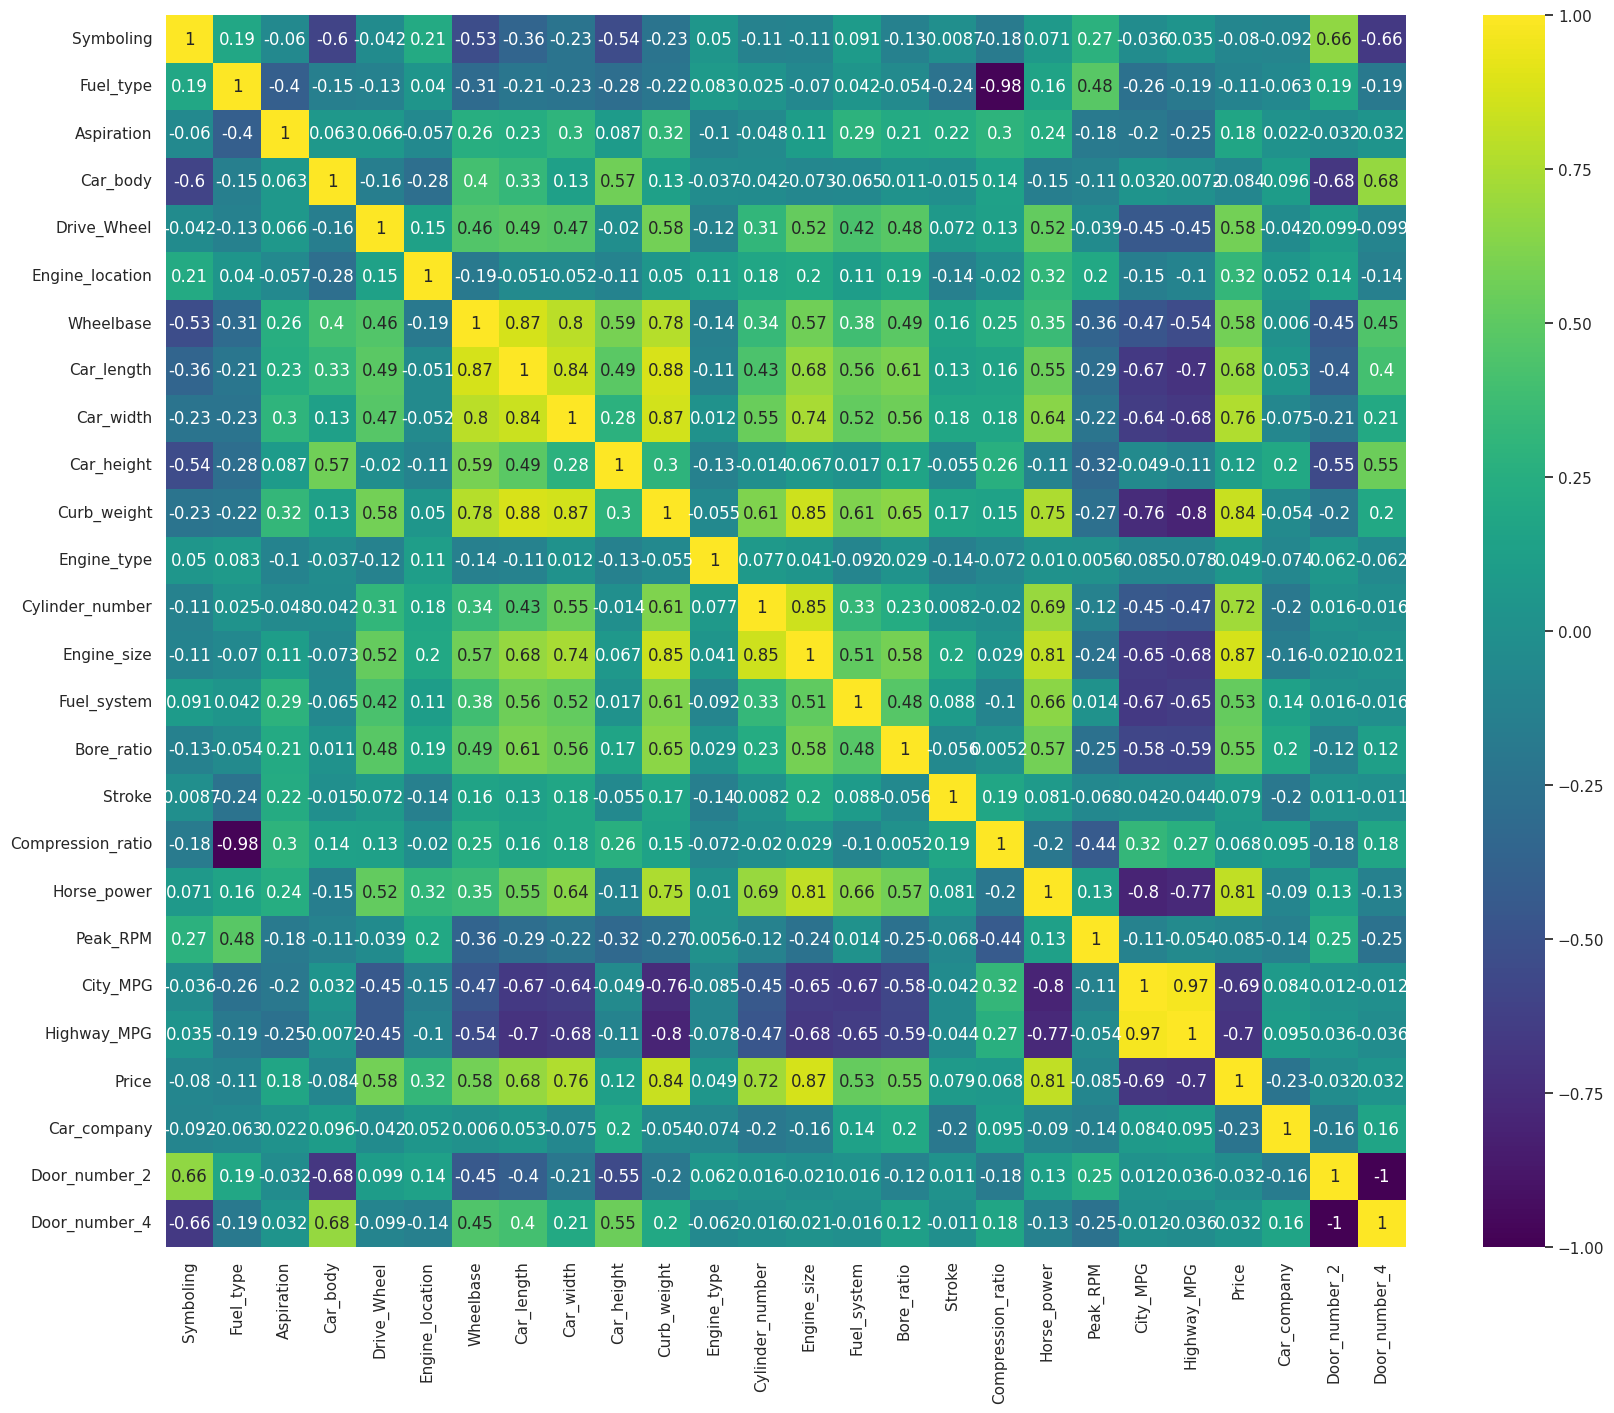

In [ ]:
plt.figure(figsize = (20,16),pointsize=15)
sns.heatmap(data.corr(),annot=True,cmap= 'viridis')
#có sự đa cộng tuyến giữa các cột. Car_length,_base, car_width, Curb_weigh

In [ ]:
# tạo cột mới với tỉ lệ giữa chiều rộng và chiều cao
data['Car_width_to_height_ratio'] = data['Car_width'] / data['Car_height']


In [ ]:
data.head()

,Symboling,Fuel_type,Aspiration,Car_body,Drive_Wheel,Engine_location,Wheelbase,Car_length,Car_width,Car_height,...,Compression_ratio,Horse_power,Peak_RPM,City_MPG,Highway_MPG,Price,Car_company,Door_number_2,Door_number_4,Car_width_to_height_ratio
0,3,1,0,0,2,0,88.6,168.8,64.1,48.8,...,9.0,111,5000,21,27,13495.0,1,1,0,1.313525
1,3,1,0,0,2,0,88.6,168.8,64.1,48.8,...,9.0,111,5000,21,27,16500.0,1,1,0,1.313525
2,1,1,0,2,2,0,94.5,171.2,65.5,52.4,...,9.0,154,5000,19,26,16500.0,1,1,0,1.250000
3,2,1,0,3,1,0,99.8,176.6,66.2,54.3,...,10.0,102,5500,24,30,13950.0,2,0,1,1.219153
4,2,1,0,3,0,0,99.4,176.6,66.4,54.3,...,8.0,115,5500,18,22,17450.0,2,0,1,1.222836


In [ ]:
data.drop(columns=['Car_width','Car_height'],inplace=True)

In [ ]:
# Tính trung bình công suất cho từng loại động cơ
average_horsepower_by_engine = data.groupby('Engine_type')['Horse_power'].mean().reset_index()
average_horsepower_by_engine['Horse_power'] = average_horsepower_by_engine['Horse_power'].round(2)

# Đổi tên cột để phân biệt với cột Horse_power gốc
average_horsepower_by_engine = average_horsepower_by_engine.rename(columns={'Horse_power': 'Avg_Horse_power'})

# Kết hợp lại với dữ liệu gốc
data = data.merge(average_horsepower_by_engine, on='Engine_type', how='left')


In [ ]:
data.head()

,Symboling,Fuel_type,Aspiration,Car_body,Drive_Wheel,Engine_location,Wheelbase,Car_length,Curb_weight,Engine_type,...,Horse_power,Peak_RPM,City_MPG,Highway_MPG,Price,Car_company,Door_number_2,Door_number_4,Car_width_to_height_ratio,Avg_Horse_power
0,3,1,0,0,2,0,88.6,168.8,2548,0,...,111,5000,21,27,13495.0,1,1,0,1.313525,146.00
1,3,1,0,0,2,0,88.6,168.8,2548,0,...,111,5000,21,27,16500.0,1,1,0,1.313525,146.00
2,1,1,0,2,2,0,94.5,171.2,2823,5,...,154,5000,19,26,16500.0,1,1,0,1.250000,169.54
3,2,1,0,3,1,0,99.8,176.6,2337,3,...,102,5500,24,30,13950.0,2,0,1,1.219153,93.65
4,2,1,0,3,0,0,99.4,176.6,2824,3,...,115,5500,18,22,17450.0,2,0,1,1.222836,93.65


In [ ]:
data.drop(columns=['Engine_type','Horse_power'],inplace=True)

In [ ]:
# tạo cột tính tỉ lệ giữa chiều dài cơ sở  và chiều dài xe, chiều dài cơ sở và trọng lượng hạn chế ,Kích thước động cơ và trọng lượng hạn chế
data['Wheel_base_to_Car_length_Ratio'] = data['Wheelbase'] / data['Car_length']
data['Wheel_base_to_Curb_weight_Ratio'] = data['Wheelbase'] / data['Curb_weight']
data['Engine_size_to_Curb_weight_Ratio'] = data['Engine_size'] / data['Curb_weight']

In [ ]:
# xoá các cột cũ
data.drop(columns=['Wheelbase','Car_length','Curb_weight','Engine_size'],inplace=True)

In [ ]:
# xoá các cột có mối tương quan yếu
data.drop(columns=['City_MPG','Highway_MPG'],inplace=True)

In [ ]:
data.drop(columns=['Wheel_base_to_Curb_weight_Ratio'],inplace=True)

<Axes: >

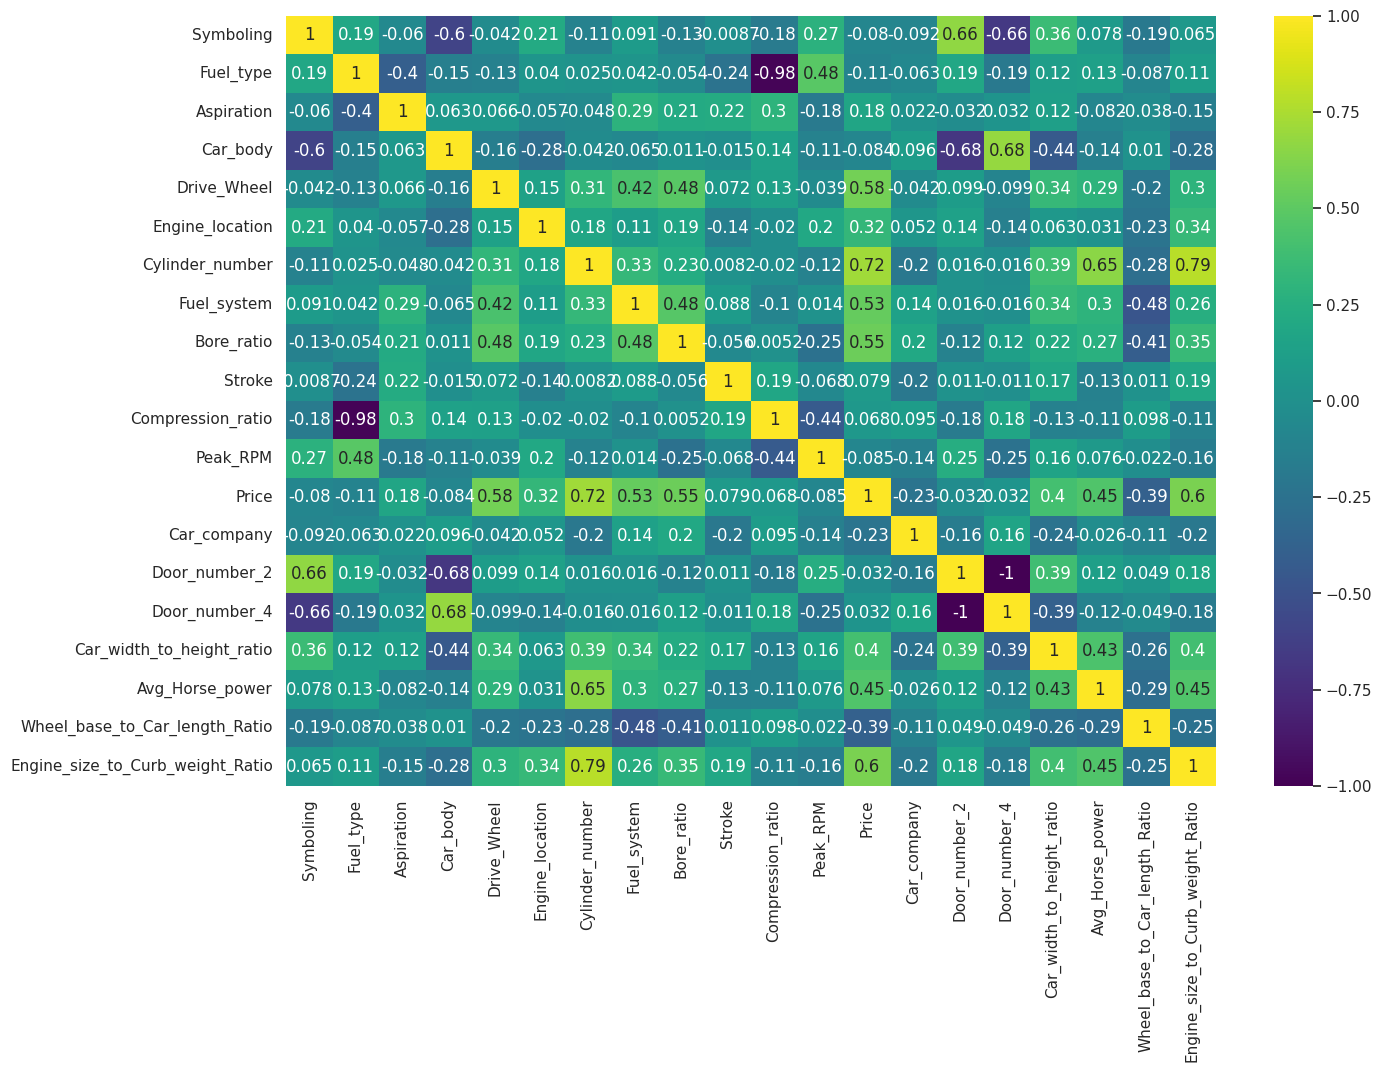

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap= 'viridis')
# có sự đa động tuyến tại cột. Engine_size_to_Curb_weight_Ratio và Cylinder_number. thực hiện giảm chiều PCA


In [ ]:
from sklearn.decomposition import PCA

# Khởi tạo PCA với số thành phần chính bạn muốn giữ lại
pca = PCA(n_components=1)

# Fit và biến đổi dữ liệu
X_pca = pca.fit_transform(data)

# Xem xét tỷ lệ phần trăm phương sai được bao quát bởi từng thành phần chính
explained_variance = pca.explained_variance_ratio_

# In ra tỷ lệ phần trăm phương sai
print(explained_variance)


[0.99646474]


In [ ]:

y = data['Price']
featureName1 =  data.columns.difference(['Price'])
print(f'featureName: {list(featureName1)}')


featureName: ['Aspiration', 'Avg_Horse_power', 'Bore_ratio', 'Car_body', 'Car_company', 'Car_width_to_height_ratio', 'Compression_ratio', 'Cylinder_number', 'Door_number_2', 'Door_number_4', 'Drive_Wheel', 'Engine_location', 'Engine_size_to_Curb_weight_Ratio', 'Fuel_system', 'Fuel_type', 'Peak_RPM', 'Stroke', 'Symboling', 'Wheel_base_to_Car_length_Ratio']


In [ ]:
X = data[featureName1]

In [ ]:
X

,Aspiration,Avg_Horse_power,Bore_ratio,Car_body,Car_company,Car_width_to_height_ratio,Compression_ratio,Cylinder_number,Door_number_2,Door_number_4,Drive_Wheel,Engine_location,Engine_size_to_Curb_weight_Ratio,Fuel_system,Fuel_type,Peak_RPM,Stroke,Symboling,Wheel_base_to_Car_length_Ratio
0,0,146.00,3.47,0,1,1.313525,9.0,4,1,0,2,0,0.051020,5,1,5000,2.68,3,0.524882
1,0,146.00,3.47,0,1,1.313525,9.0,4,1,0,2,0,0.051020,5,1,5000,2.68,3,0.524882
2,0,169.54,2.68,2,1,1.250000,9.0,6,1,0,2,0,0.053843,5,1,5000,3.47,1,0.551986
3,0,93.65,3.19,3,2,1.219153,10.0,4,0,1,1,0,0.046641,5,1,5500,3.40,2,0.565119
4,0,93.65,3.19,3,2,1.222836,8.0,5,0,1,0,0,0.048159,5,1,5500,3.40,2,0.562854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,93.65,3.78,3,26,1.241441,9.5,4,0,1,2,0,0.047764,5,1,5400,3.15,-1,0.577860
201,1,93.65,3.78,3,26,1.239640,8.7,4,0,1,2,0,0.046245,5,1,5300,3.15,-1,0.577860
202,0,169.54,3.58,3,26,1.241441,8.8,6,0,1,2,0,0.057437,5,1,5500,2.87,-1,0.577860
203,1,93.65,3.01,3,26,1.241441,23.0,6,0,1,2,0,0.045073,3,0,4800,3.40,-1,0.577860


In [ ]:
Var = sm.OLS(y,sm.add_constant(X))
Var_resul =Var.fit()
print(Var_resul.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     51.07
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           4.93e-62
Time:                        16:55:17   Log-Likelihood:                -1949.8
No. Observations:                 205   AIC:                             3938.
Df Residuals:                     186   BIC:                             4001.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
#loại bỏ các mẫu dữ liệu không gia tri với P>|t| >0.05
X.drop(columns=['Aspiration','Car_width_to_height_ratio','Compression_ratio','Door_number_2','Door_number_4','Stroke','Symboling','Wheel_base_to_Car_length_Ratio'],inplace=True)

<ipython-input-69-0494108fb01b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Aspiration','Car_width_to_height_ratio','Compression_ratio','Door_number_2','Door_number_4','Stroke','Symboling','Wheel_base_to_Car_length_Ratio'],inplace=True)


In [ ]:
X

,Avg_Horse_power,Bore_ratio,Car_body,Car_company,Cylinder_number,Drive_Wheel,Engine_location,Engine_size_to_Curb_weight_Ratio,Fuel_system,Fuel_type,Peak_RPM
0,146.00,3.47,0,1,4,2,0,0.051020,5,1,5000
1,146.00,3.47,0,1,4,2,0,0.051020,5,1,5000
2,169.54,2.68,2,1,6,2,0,0.053843,5,1,5000
3,93.65,3.19,3,2,4,1,0,0.046641,5,1,5500
4,93.65,3.19,3,2,5,0,0,0.048159,5,1,5500
...,...,...,...,...,...,...,...,...,...,...,...
200,93.65,3.78,3,26,4,2,0,0.047764,5,1,5400
201,93.65,3.78,3,26,4,2,0,0.046245,5,1,5300
202,169.54,3.58,3,26,6,2,0,0.057437,5,1,5500
203,93.65,3.01,3,26,6,2,0,0.045073,3,0,4800


In [ ]:
Var = sm.OLS(y,sm.add_constant(X))
Var_resul =Var.fit()
print(Var_resul.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     80.08
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           8.93e-66
Time:                        16:55:17   Log-Likelihood:                -1956.5
No. Observations:                 205   AIC:                             3937.
Df Residuals:                     193   BIC:                             3977.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
#xoá dữ liệu không giá trên cột X
X.drop(columns=['Peak_RPM','Car_body'],inplace=True)

<ipython-input-72-79c85c084737>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Peak_RPM','Car_body'],inplace=True)


In [ ]:
X


,Avg_Horse_power,Bore_ratio,Car_company,Cylinder_number,Drive_Wheel,Engine_location,Engine_size_to_Curb_weight_Ratio,Fuel_system,Fuel_type
0,146.00,3.47,1,4,2,0,0.051020,5,1
1,146.00,3.47,1,4,2,0,0.051020,5,1
2,169.54,2.68,1,6,2,0,0.053843,5,1
3,93.65,3.19,2,4,1,0,0.046641,5,1
4,93.65,3.19,2,5,0,0,0.048159,5,1
...,...,...,...,...,...,...,...,...,...
200,93.65,3.78,26,4,2,0,0.047764,5,1
201,93.65,3.78,26,4,2,0,0.046245,5,1
202,169.54,3.58,26,6,2,0,0.057437,5,1
203,93.65,3.01,26,6,2,0,0.045073,3,0


In [ ]:
Var = sm.OLS(y,sm.add_constant(X))
Var_resul =Var.fit()
print(Var_resul.summary())
# con lại Avg_Horse_power và Fuel_type vẫn có ảnh hưởng đến giá trị nên có thể giữ lại

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     96.95
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           4.34e-67
Time:                        16:55:17   Log-Likelihood:                -1958.2
No. Observations:                 205   AIC:                             3936.
Df Residuals:                     195   BIC:                             3970.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

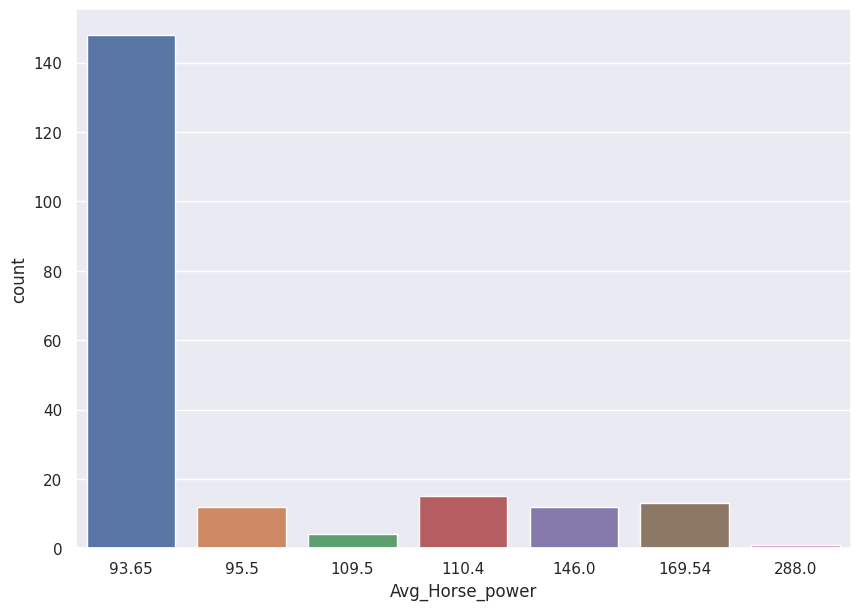

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x= 'Avg_Horse_power',data=data)
plt.show()

In [ ]:
data['Avg_Horse_power'].min()


93.65

In [ ]:
data['Avg_Horse_power'].max()

288.0

In [ ]:
# chuẩn hoá dữ liệu giảm sai số
power_bin = [ 93.65, 95.5, 109.5, 110.4, 146.0, 288]
power_bin.sort()  # Sắp xếp theo thứ tự tăng dần
power_label = [ '93.65-95.5', '95.51-109.5', '109.51-110.4', '110.41-146.0', '146.01+']
data['Power_Group'] = pd.cut(data['Avg_Horse_power'], bins=power_bin, labels=power_label)


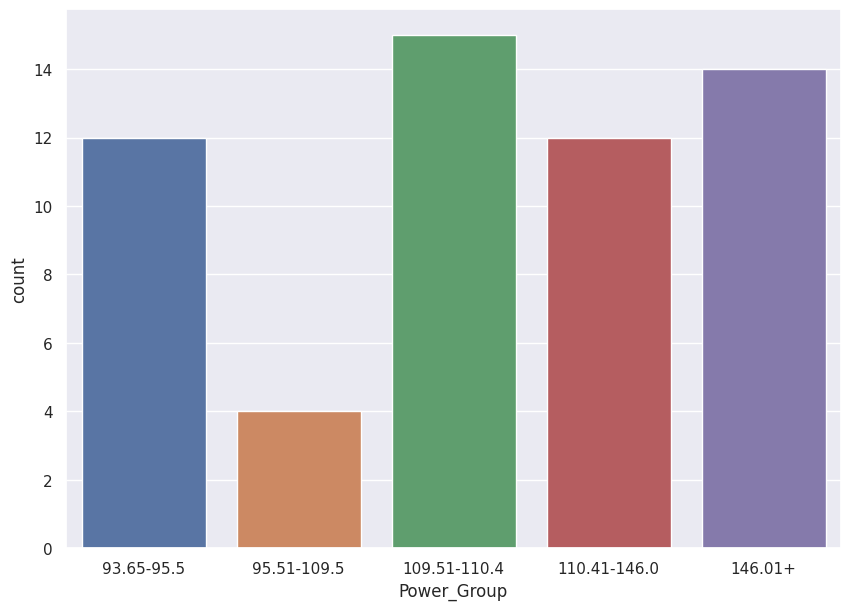

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x= 'Power_Group',data=data)
plt.show()

In [ ]:
power_z_core=(data['Avg_Horse_power']-data['Avg_Horse_power'].mean())/data['Avg_Horse_power'].std() #score cho biết mức độ sai khác giữa giá trị mẫu và trung bình, thể hiện trong đơn vị độ lệch chuẩn.
threshold=3
power_oulire_mask= np.abs(power_z_core)>threshold
power_oulire_mask

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: Avg_Horse_power, Length: 205, dtype: bool

In [ ]:
#thực hiện việc loại bỏ các mẫu dữ liệu được đánh dấu là outliers
data=data[~power_oulire_mask]

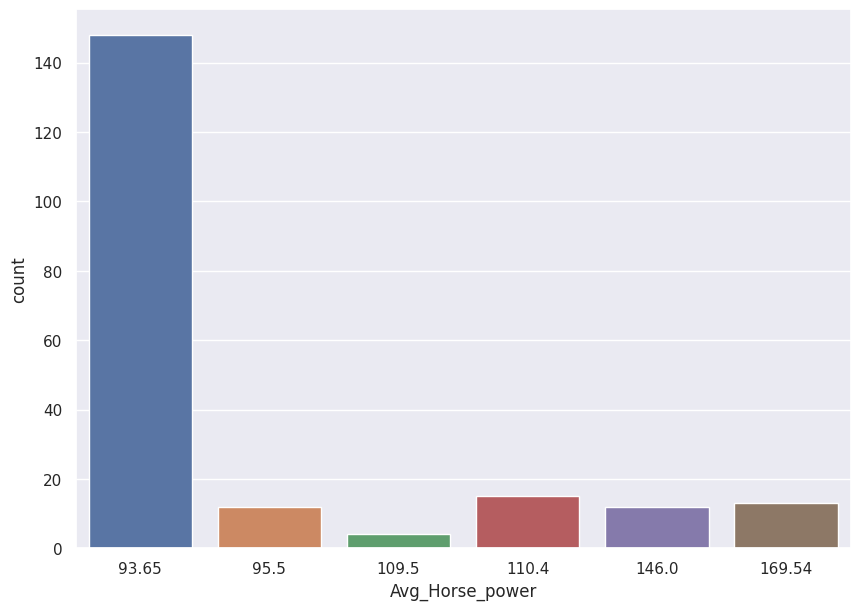

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x= 'Avg_Horse_power',data=data)
plt.show()

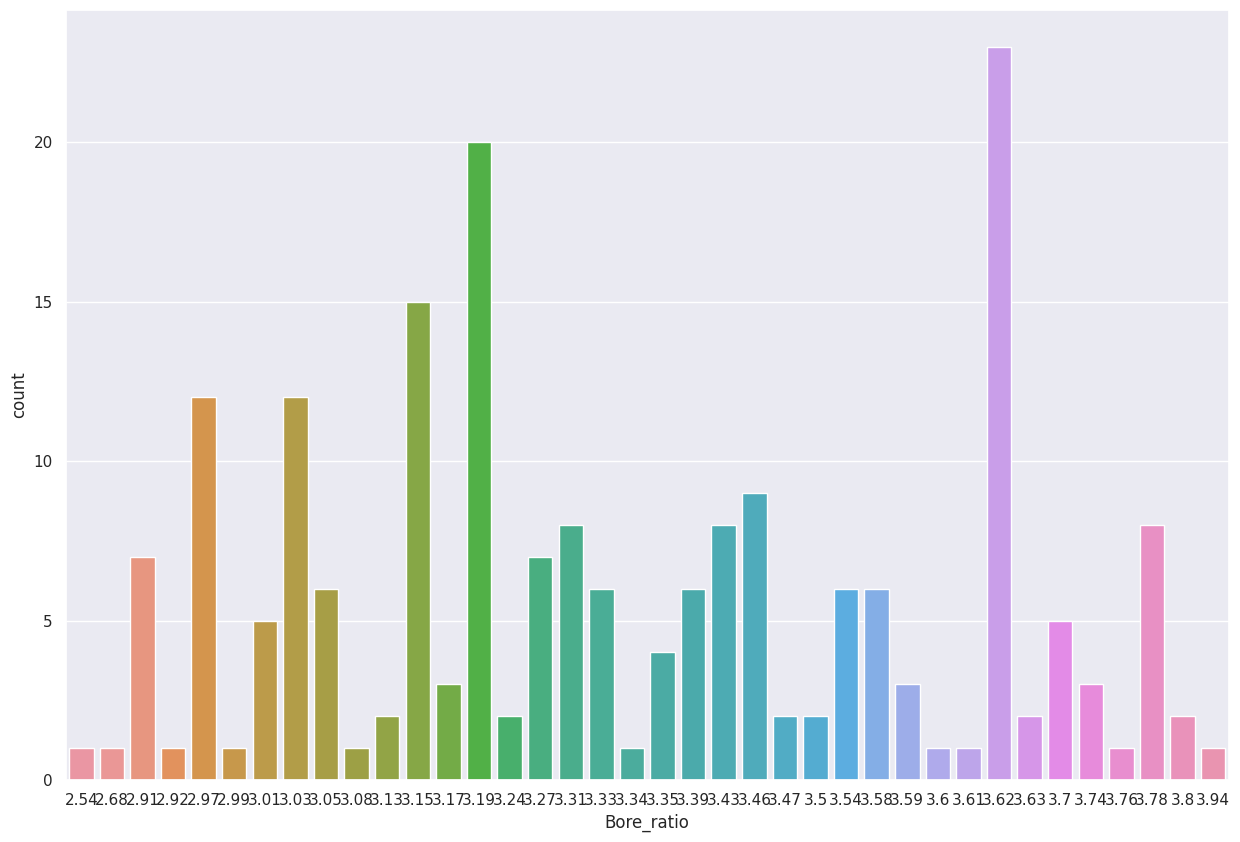

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x= 'Bore_ratio',data=data)
plt.show()

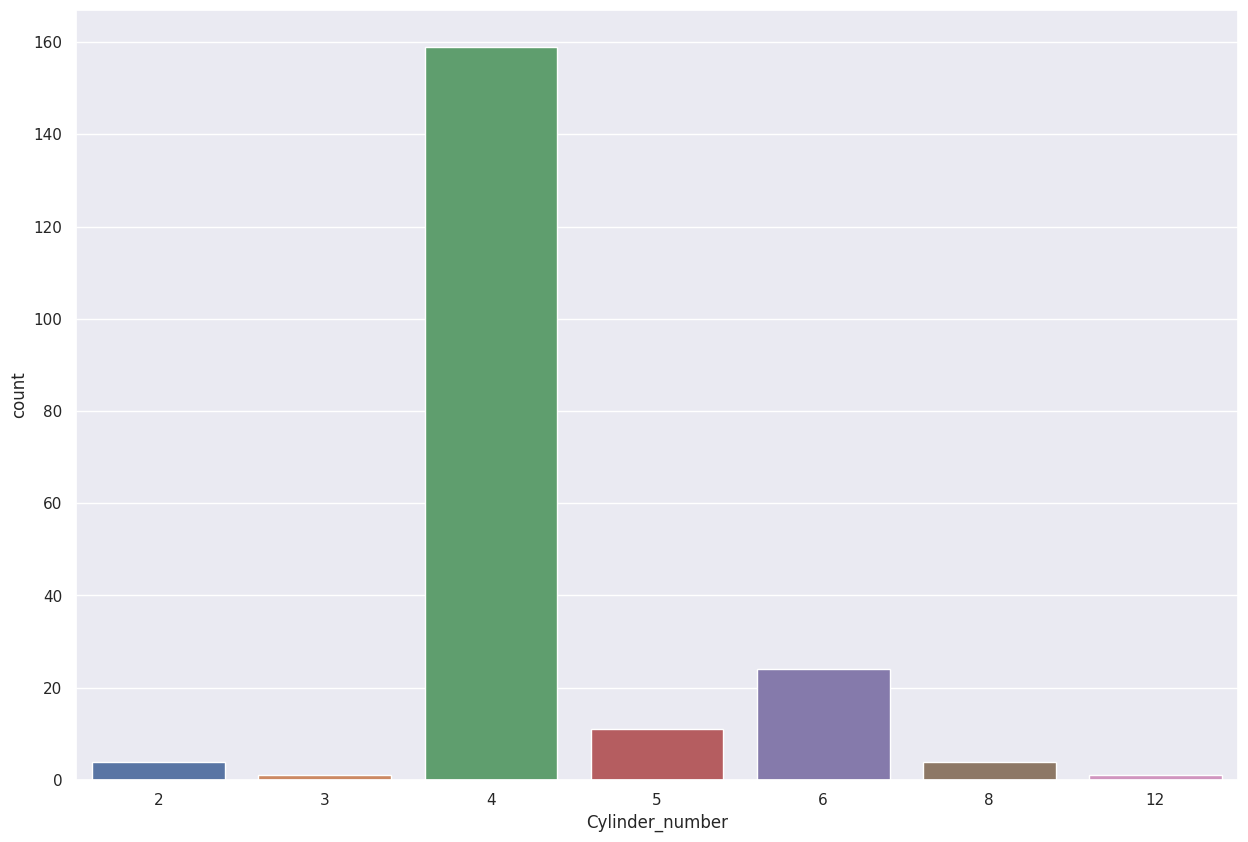

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x= 'Cylinder_number',data=data)
plt.show()
## dữ liệu đã outliers


In [ ]:
# chọn lại dữ liệu tập tin có các cột ảnh hưởng giá xe
data_1= data[['Avg_Horse_power','Bore_ratio','Car_company','Cylinder_number','Drive_Wheel','Engine_location','Engine_size_to_Curb_weight_Ratio','Fuel_system','Fuel_type','Price']]

In [ ]:
data_1

,Avg_Horse_power,Bore_ratio,Car_company,Cylinder_number,Drive_Wheel,Engine_location,Engine_size_to_Curb_weight_Ratio,Fuel_system,Fuel_type,Price
0,146.00,3.47,1,4,2,0,0.051020,5,1,13495.0
1,146.00,3.47,1,4,2,0,0.051020,5,1,16500.0
2,169.54,2.68,1,6,2,0,0.053843,5,1,16500.0
3,93.65,3.19,2,4,1,0,0.046641,5,1,13950.0
4,93.65,3.19,2,5,0,0,0.048159,5,1,17450.0
...,...,...,...,...,...,...,...,...,...,...
200,93.65,3.78,26,4,2,0,0.047764,5,1,16845.0
201,93.65,3.78,26,4,2,0,0.046245,5,1,19045.0
202,169.54,3.58,26,6,2,0,0.057437,5,1,21485.0
203,93.65,3.01,26,6,2,0,0.045073,3,0,22470.0


<Axes: >

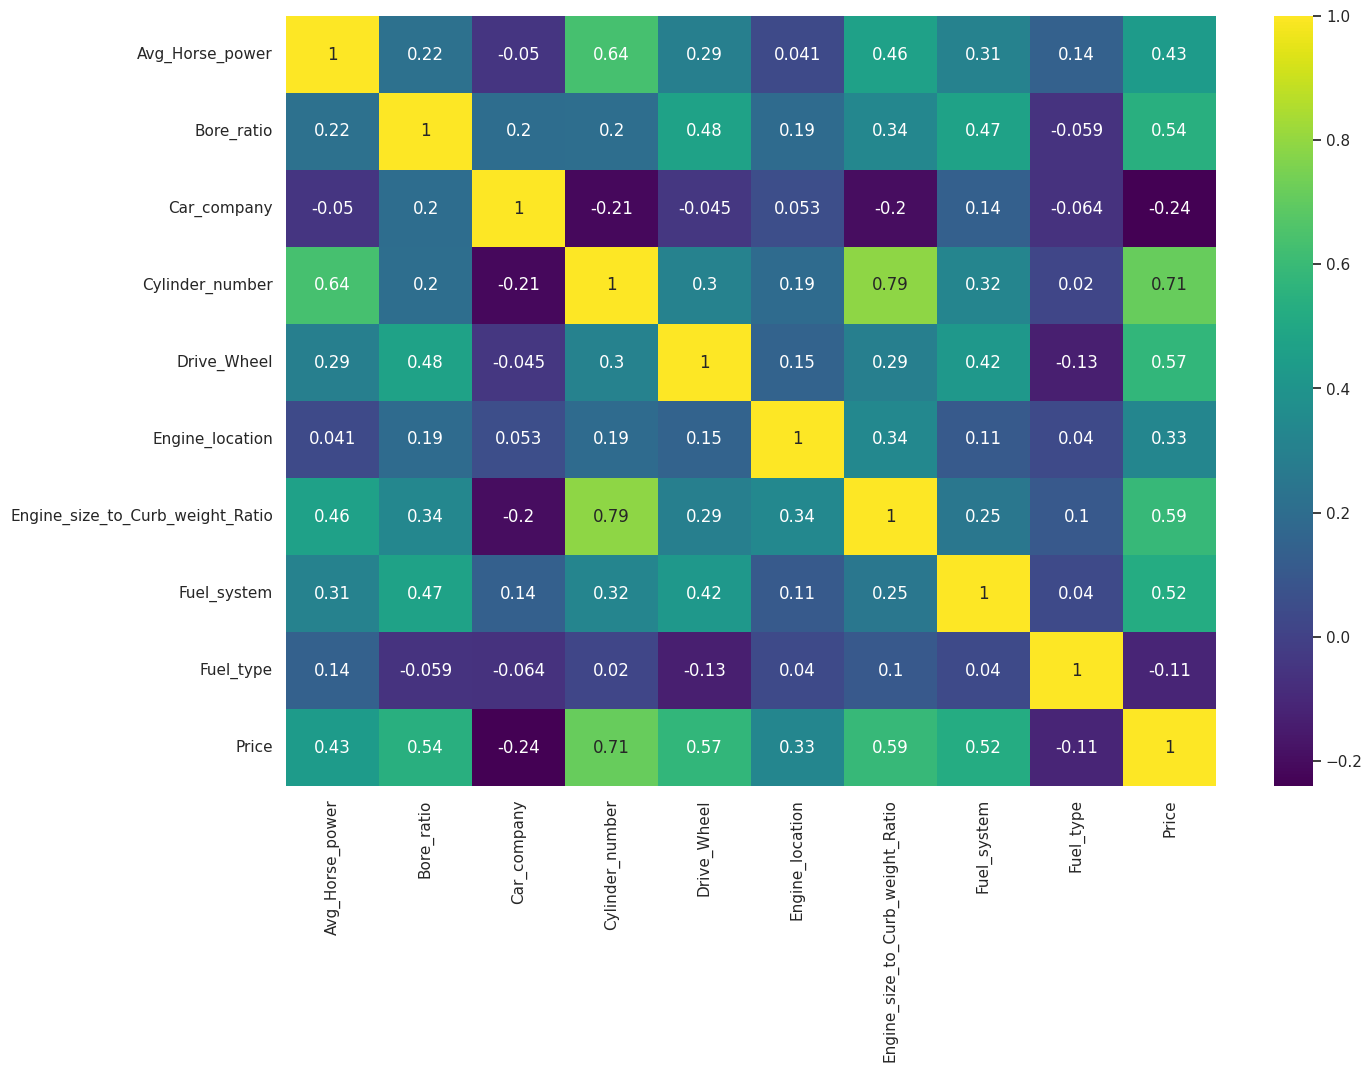

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data_1.corr(),annot=True,cmap= 'viridis')
# thực hiện PCA đối với tập data_1

In [ ]:
from sklearn.decomposition import PCA

# Khởi tạo PCA với số thành phần chính bạn muốn giữ lại
pca = PCA(n_components=1)

# Fit và biến đổi dữ liệu
X_1_pca = pca.fit_transform(data_1)

# Xem xét tỷ lệ phần trăm phương sai được bao quát bởi từng thành phần chính
explained_variance_1 = pca.explained_variance_ratio_

# In ra tỷ lệ phần trăm phương sai
print(explained_variance_1)
# tỉ lệ tăng lên đáng kể. mô hình giữ lại hầu như tất cả mà không mất giữ liệu

[0.99999305]


# Split dataset into training / testing sets & Normalize (if needed)

In [ ]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: Price, Length: 205, dtype: float64

In [ ]:
X

,Avg_Horse_power,Bore_ratio,Car_company,Cylinder_number,Drive_Wheel,Engine_location,Engine_size_to_Curb_weight_Ratio,Fuel_system,Fuel_type
0,146.00,3.47,1,4,2,0,0.051020,5,1
1,146.00,3.47,1,4,2,0,0.051020,5,1
2,169.54,2.68,1,6,2,0,0.053843,5,1
3,93.65,3.19,2,4,1,0,0.046641,5,1
4,93.65,3.19,2,5,0,0,0.048159,5,1
...,...,...,...,...,...,...,...,...,...
200,93.65,3.78,26,4,2,0,0.047764,5,1
201,93.65,3.78,26,4,2,0,0.046245,5,1
202,169.54,3.58,26,6,2,0,0.057437,5,1
203,93.65,3.01,26,6,2,0,0.045073,3,0


In [ ]:
print('X',X.size)
print('y',y.size)

X 1845
y 205


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,Avg_Horse_power,Bore_ratio,Car_company,Cylinder_number,Drive_Wheel,Engine_location,Engine_size_to_Curb_weight_Ratio,Fuel_system,Fuel_type
66,93.65,3.43,11,4,2,0,0.049630,3,0
111,95.50,3.46,15,4,2,0,0.039024,5,1
153,93.65,3.05,22,4,1,0,0.040351,1,1
96,93.65,3.15,14,4,1,0,0.049214,1,1
38,93.65,3.15,7,4,1,0,0.048056,0,1
...,...,...,...,...,...,...,...,...,...
106,169.54,3.43,14,6,2,0,0.057662,5,1
14,93.65,3.31,3,6,2,0,0.053682,5,1
92,93.65,3.15,14,4,1,0,0.050052,1,1
179,146.00,3.27,22,6,2,0,0.056698,5,1


In [ ]:
print("X_train",X_train.size)
print("X_test",X_test.size)

X_train 1476
X_test 369


In [ ]:
print("y_train",y_train.size)
print("y_test",y_test.size)

y_train 164
y_test 41


# Trainning

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
n_comp = 9
# Khởi tạo PCA
pca = PCA(n_components=n_comp)

# Biến đổi dữ liệu huấn luyện
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# Khởi tạo mô hình hồi quy tuyến tính
linear_model = LinearRegression()

# Huấn luyện mô hình trên dữ liệu đã biến đổi bằng PCA
linear_model.fit(X_train_pca, y_train)


LinearRegression()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_pca,y_train)

KNeighborsRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train_pca,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_pca,y_train)

DecisionTreeRegressor(random_state=42)

# Evaluation

In [ ]:
# Dự đoán y trên tập X_test
from sklearn.linear_model import LinearRegression
linear_model_y_pred =linear_model.predict(X_test_pca)
knn_y_pred = knn_model.predict(X_test_pca)
forest_model_y_pred = forest_model.predict(X_test_pca)
tree_model_y_pred = tree_model.predict(X_test_pca)

In [ ]:
linear_model_y_pred

array([24685.77589112, 16270.6233221 ,  8208.0200942 , 13427.78483966,
       23448.18862038,  7448.36902164, 10144.26584472,  6609.73307073,
       14091.23776039,  8459.0452768 , 12332.79275279,  9041.08951994,
       18005.13726275,  9693.48494523, 31037.46079332,  5303.39404247,
        4000.13155955, 13895.00308769,  8921.00158206, 13608.76904185,
        9745.18834905, 18768.15259484,  7342.05636046,  4561.61567745,
        7980.56760279, 25326.59173531, 13218.94908854, 16385.87865323,
        7495.52862923, 15951.38152053, 22720.1116847 ,  5773.94455698,
        4392.34990065, 20055.7879097 , 10735.71427799, 22653.62671203,
       12171.75234358,  7488.01484498,  7711.61401266, 14381.06640709,
       10387.32746087])

In [ ]:
knn_y_pred


array([23754. , 18641. ,  7449. , 12382. , 25280. ,  7129. ,  9938. ,
        7116. , 19128.6,  9986.2,  9390. ,  7658. , 14094. , 12062.4,
       33428. ,  6832. ,  6617. , 11977.8,  6747. , 19128.6,  9665. ,
       16639. ,  7129. ,  6641.4,  6941.6, 23754. , 11771. , 18203. ,
        7129. , 18203. , 25280. ,  7228.6,  7148. , 16639. , 11977.8,
       25280. ,  8332.2, 22138.2,  8094.1, 11977.8,  6935. ])

In [ ]:
forest_model_y_pred

array([33056.76      , 20222.765     ,  8554.64666667, 12828.1       ,
       26314.47      ,  7333.97      ,  9018.29      ,  8045.47      ,
       13854.52107143,  9011.05      , 21514.49      ,  8936.42      ,
       16582.3625    , 10859.2       , 40099.085     ,  6302.54      ,
        9911.45916667, 13626.3       ,  7825.25333333, 13240.78107143,
       10361.08166667, 14352.685     ,  7442.13      ,  6706.6925    ,
        7233.9075    , 32477.26      ,  9046.25      , 17974.58      ,
        7331.92      , 16509.64      , 26219.75      ,  6766.31      ,
        8842.315     , 11766.59833333,  8847.68      , 26060.57      ,
       13834.455     , 12696.98      ,  7678.585     , 13816.1       ,
        6005.38      ])

In [ ]:
tree_model_y_pred

array([36880., 23875.,  8949., 12170., 31600.,  7349.,  7898.,  8358.,
       11694.,  7995., 22470.,  8058., 16503., 10898., 45400.,  6338.,
       10698., 14869.,  6989., 11694., 10245., 13499.,  7349.,  6855.,
        7609., 36880.,  8449., 16515.,  7349., 15985., 31600.,  6692.,
        8778.,  8358.,  7957., 31600., 11694., 11845.,  6795., 14869.,
        5118.])

In [ ]:
# Đánh giá mô hình (có thể sử dụng các phương pháp đánh giá phù hợp)
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
print('Mean squared error:%.2f'%
      mean_squared_error(y_test, linear_model.predict(X_test_pca)))
print('Coefficient of determination:%.2f'%
      r2_score(y_test, linear_model.predict(X_test_pca)))

Mean squared error:15137686.81
Coefficient of determination:0.81


In [ ]:
print('Mean squared error:%.2f'%
      mean_squared_error(y_test, knn_model.predict(X_test_pca)))
print('Coefficient of determination:%.2f'%
      r2_score(y_test, knn_model.predict(X_test_pca)))

Mean squared error:22204393.80
Coefficient of determination:0.72


In [ ]:
print('Mean squared error:%.2f'%
      mean_squared_error(y_test, forest_model.predict(X_test_pca)))
print('Coefficient of determination:%.2f'%
      r2_score(y_test, forest_model.predict(X_test_pca)))

Mean squared error:9146479.98
Coefficient of determination:0.88


In [ ]:
print('Mean squared error:%.2f'%
      mean_squared_error(y_test, tree_model.predict(X_test_pca)))
print('Coefficient of determination:%.2f'%
      r2_score(y_test, tree_model.predict(X_test_pca)))

Mean squared error:12558324.75
Coefficient of determination:0.84


# chạy mô hình không phải pca đối các mô hình knn,random forest,tree. xem thử kết quả

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

Evaluation

In [ ]:

knn_y_pred_1 = knn_model.predict(X_test)
forest_model_y_pred_1 = forest_model.predict(X_test)
tree_model_y_pred_1 = tree_model.predict(X_test)

In [ ]:
knn_y_pred_1

array([23754. , 18641. ,  7449. , 12382. , 25280. ,  7129. ,  9938. ,
        7116. , 19128.6,  9986.2,  9390. ,  7658. , 14094. , 12062.4,
       33428. ,  6832. ,  6456. , 11977.8,  6747. , 19128.6,  9665. ,
       16639. ,  7129. ,  6641.4,  6941.6, 23754. , 11771. , 18203. ,
        7129. , 18203. , 25280. ,  7228.6,  7148. , 16639. , 11977.8,
       25280. ,  8332.2, 22138.2,  8094.1, 11977.8,  6935. ])

In [ ]:
forest_model_y_pred_1

array([34731.8       , 21409.85      ,  8484.11      , 13855.69      ,
       27202.18857143,  7439.715     ,  8844.71      ,  8154.52      ,
       14235.86      ,  8702.14      , 15714.86      ,  8192.74      ,
       15627.25666667, 10674.57      , 40498.005     ,  6574.75      ,
        6464.91333333, 13352.17      ,  7544.07      , 13930.845     ,
       10290.345     , 15035.23333333,  7430.31      ,  6795.62666667,
        7273.02333333, 34261.33      ,  9200.98      , 17978.        ,
        7042.055     , 16576.26      , 26424.57857143,  6536.83      ,
        7615.05      , 21884.015     ,  8347.35      , 26530.73857143,
       14534.69      , 11954.34      ,  7408.23833333, 13972.55      ,
        6067.1       ])

In [ ]:
tree_model_y_pred_1

array([32528. , 23875. ,  8949. , 17425. , 31600. ,  7349. ,  7898. ,
        8358. , 15510. ,  7995. , 24565. ,  8058. , 14869. , 10898. ,
       45400. ,  6338. ,  5399. , 12764. ,  6989. , 17425. , 10245. ,
       13499. ,  7349. ,  6855. ,  7609. , 32528. ,  8449. , 16515. ,
        6938. , 15985. , 31600. ,  6692. ,  8778. , 31600. ,  7957. ,
       31600. , 18150. , 11845. ,  8916.5, 14869. ,  5118. ])

In [ ]:
## Đánh giá mô hình (có thể sử dụng các phương pháp đánh giá phù hợp)
print('Mean squared error:%.2f'%
      mean_squared_error(y_test, knn_model.predict(X_test)))
print('Coefficient of determination:%.2f'%
      r2_score(y_test, knn_model.predict(X_test)))

Mean squared error:22193512.55
Coefficient of determination:0.72


In [ ]:
print('Mean squared error:%.2f'%
      mean_squared_error(y_test, forest_model.predict(X_test)))
print('Coefficient of determination:%.2f'%
      r2_score(y_test, forest_model.predict(X_test)))

Mean squared error:4837847.36
Coefficient of determination:0.94


In [ ]:
print('Mean squared error:%.2f'%
      mean_squared_error(y_test, tree_model.predict(X_test)))
print('Coefficient of determination:%.2f'%
      r2_score(y_test, tree_model.predict(X_test)))

Mean squared error:15533622.02
Coefficient of determination:0.80


# đánh gía mô hình

Khi sử dụng PCA (n_comp=9):

Mô hình K-Nearest Neighbors (knn_model) có MSE là 22204393.80 và R-squared là 0.72.
Mô hình Random Forest (forest_model) có MSE là 9146479.98 và R-squared là 0.88.
Mô hình Decision Tree (tree_model) có MSE là 12558324.75 và R-squared là 0.84.

Khi không sử dụng PCA:

Mô hình K-Nearest Neighbors (knn_model) có MSE là 22193512.55 và R-squared là 0.72.
Mô hình Random Forest (forest_model) có MSE là 4837847.36 và R-squared là 0.94.
Mô hình Decision Tree (tree_model) có MSE là 15533622.02 và R-squared là 0.80.

 Dựa trên kết quả này:

  Mô hình K-Nearest Neighbors có hiệu suất tương tự khi sử dụng PCA hoặc không sử dụng PCA, nghĩa là PCA không cải thiện hiệu suất cho mô hình này.

Mô hình Random Forest và Decision Tree đạt hiệu suất tốt hơn khi không sử dụng PCA. Điều này có thể xảy ra vì PCA loại bỏ một số thông tin từ dữ liệu ban đầu và có thể dẫn đến mất mát thông tin quan trọng đối với mô hình cây quyết định.

**MÔ HÌNH TỐT NHẤT LAD RANDOM FOREST KHÔNG PCA VỚI TỈ LỆ CHÍNH XÁC CAO 94% VÀ CÓ PHƯƠNG SAI THẤP NHẤT TRONG SỐ CÁC MODEL**


## TRẢ LỜI YÊU CẦU ĐỀ 1

In [ ]:
data_1

,Avg_Horse_power,Bore_ratio,Car_company,Cylinder_number,Drive_Wheel,Engine_location,Engine_size_to_Curb_weight_Ratio,Fuel_system,Fuel_type,Price
0,146.00,3.47,1,4,2,0,0.051020,5,1,13495.0
1,146.00,3.47,1,4,2,0,0.051020,5,1,16500.0
2,169.54,2.68,1,6,2,0,0.053843,5,1,16500.0
3,93.65,3.19,2,4,1,0,0.046641,5,1,13950.0
4,93.65,3.19,2,5,0,0,0.048159,5,1,17450.0
...,...,...,...,...,...,...,...,...,...,...
200,93.65,3.78,26,4,2,0,0.047764,5,1,16845.0
201,93.65,3.78,26,4,2,0,0.046245,5,1,19045.0
202,169.54,3.58,26,6,2,0,0.057437,5,1,21485.0
203,93.65,3.01,26,6,2,0,0.045073,3,0,22470.0


Yêu cầu : Các thông số nào của ô tô sẽ ảnh hưởng đến giá của chiếc ô tô đó?
các thông số ảnh hưởng đến giá ô tô là:
- Avg_Horse_power (Công suất trung bình của động cơ): các xe có công suất động cơ mạnh hơn có giá đắt hơn. Công suất cao thường liên quan đến hiệu suất tốt hơn, nhưng cũng có thể tăng giá thành sản xuất.
- Bore_ratio (Tỷ lệ đường kính piston của động cơ): Tỷ lệ bore ratio ảnh hưởng đến công suất và hiệu suất động cơ. Nó ảnh hưởng đến việc chọn loại nhiên liệu và hệ thống cung cấp nhiên liệu, và từ đó tác động đến giá xe.
- Car_company (Hãng sản xuất xe): Hãng sản xuất xe là một yếu tố quan trọng. Mỗi hãng thường có danh tiếng, phong cách thiết kế, và định vị riêng. Xe từ các hãng nổi tiếng hoặc cao cấp có giá đắt hơn do hình ảnh thương hiệu.
- Cylinder_number (Số xi-lanh của động cơ): Số lượng xi-lanh ảnh hưởng đến công suất và hiệu suất động cơ. Xe có động cơ nhiều xi-lanh có giá cao hơn vì nó cung cấp hiệu suất tốt hơn.
- Engine_location (Vị trí đặt động cơ): Vị trí đặt động cơ cũng ảnh hưởng đến giá. Xe có động cơ đặt ở vị trí đặc biệt (ví dụ: động cơ sau) có thể có giá đắt hơn do yêu cầu thiết kế và công nghệ đặc biệt.
- Drive_Wheel: Loại hệ thống dẫn động có thể ảnh hưởng đến giá xe. Ví dụ, các xe có hệ thống dẫn động cầu sau (RWD) thường có giá đắt hơn so với xe dẫn động cầu trước (FWD) vì RWD thường đi kèm với hiệu suất và độ bền tốt hơn.
- Engine_size_to_Curb_weight_Ratio: Tỷ lệ kích thước động cơ so với trọng lượng xe có thể ảnh hưởng đến hiệu suất và tiết kiệm nhiên liệu. Xe có tỷ lệ này cao hơn có thể có giá đắt hơn, nhưng cung cấp hiệu suất tốt hơn.
- Fuel_system và Fuel_type: Loại nhiên liệu và hệ thống cung cấp nhiên liệu (Fuel system) cũng có ảnh hưởng đáng kể đến giá xe. Ví dụ, xe sử dụng nhiên liệu cao cấp hoặc có hệ thống cung cấp nhiên liệu hiệu quả có thể có giá đắt hơn.

<Axes: >

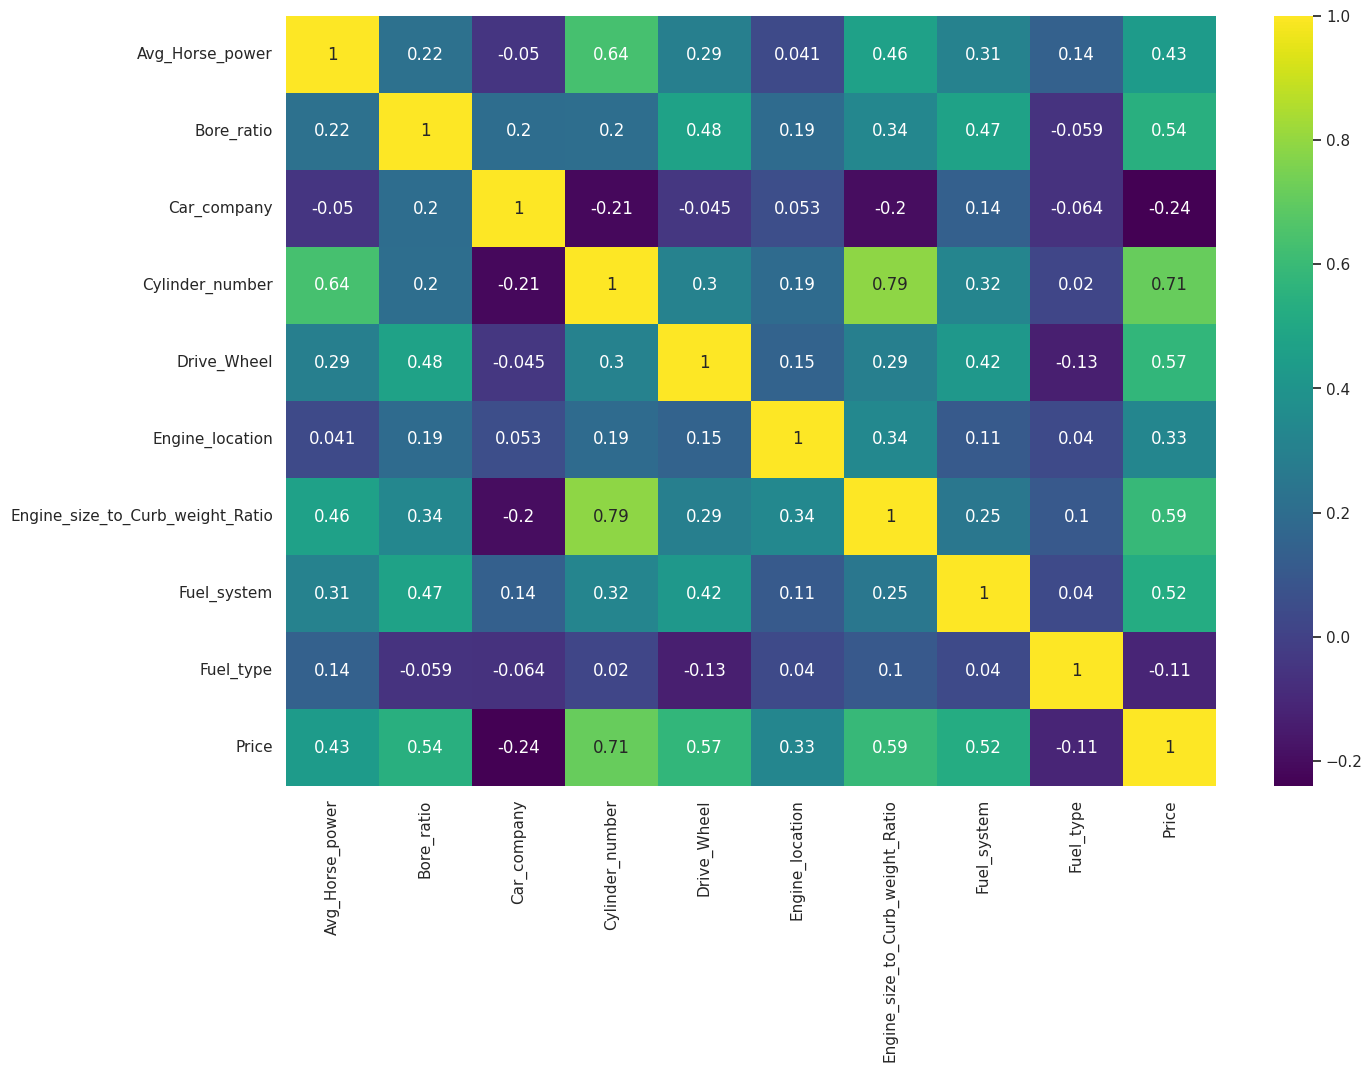

In [ ]:
#Biểu đồ mối quan hệ
plt.figure(figsize=(15,10))
sns.heatmap(data_1.corr(),annot=True,cmap= 'viridis')

**Đâu là những yếu tố quan trọng để định giá ô tô?**
bán xe tại Mỹ, có một số yếu tố quan trọng bạn nên quan tâm hơn dựa trên thị trường và sở thích của khách hàng Mỹ. Dưới đây là một số yếu tố quan trọng:
- **Kích thước động cơ và hiệu suất**: Người Mỹ thường có niềm đam mê với công suất và hiệu suất của xe. Họ thích có nhiều lựa chọn về động cơ mạnh mẽ. Do đó, cung cấp các phiên bản xe với động cơ có công suất lớn có thể hấp dẫn khách hàng.
- **Kiểu dáng và thiết kế**: Xe hơi phải có ngoại hình và thiết kế phù hợp với thị trường Mỹ. Thị trường Mỹ thích các loại xe như SUVs, xe bán tải và xe sedan.
- **Tính tiện ích và an toàn**: Một yếu tố quan trọng khác là tính tiện ích và an toàn. Khách hàng Mỹ quan tâm đến tính năng an toàn và tiện nghi như hệ thống thông tin giải trí, hệ thống đỗ xe tự động, và tích hợp với điện thoại thông minh.
- **Mức tiêu thụ nhiên liệu:** Mức tiêu thụ nhiên liệu là một yếu tố quan trọng. Khách hàng Mỹ thường đi xa và cần xe có khả năng tiết kiệm nhiên liệu.
- **Giá cả và sự cạnh tranh:** Thị trường Mỹ rất cạnh tranh, vì vậy giá cả cũng quan trọng. Đảm bảo rằng giá của bạn cạnh tranh với các đối thủ trong cùng phân khúc.
-** Dịch vụ hậu mãi và bảo hành:** Một chính sách bảo hành và dịch vụ hậu mãi tốt có thể là yếu tố quyết định khi khách hàng Mỹ quyết định mua xe.
- Hệ thống phân phối và tiếp thị: Xây dựng một hệ thống phân phối hiệu quả và chiến dịch tiếp thị tốt là rất quan trọng để tiếp cận khách hàng.

**loại bỏ một số yếu tố không liên quan đến giá sản xuất ô tô .dựa vào biểu đồ mối quan hệ ta có thể thấy được:**
- **Cylinder_number**: có chỉ số quan hệ kháo cao. Số lượng xi-lanh ảnh hưởng đến công suất và hiệu suất động cơ. nên kinh doanh các loại động cơ có số xilanh lớn
- **Avg_Horse_power**: Công suất trung bình của động cơ. ảnh hưởng đến hiệu xuất động cơ . nên chọn các loại cộng cơ công suất trung bình lớn.
-Bore_ratio: Tỷ lệ bore ratio ảnh hưởng đến công suất và hiệu suất động cơ. chọn một tỉ lệ tốt sẽ tạo động cơ mạnh mẽ.
- **Engine_location (Vị trí đặt động cơ)**: Thị trường Mỹ thích các loại xe như SUVs, xe bán tải và xe sedan. việc đặt động cơ ở trước sẽ phù hợp với thẩm mỹ của người mỹ.
- **Drive_Wheel(Loại hệ thống dẫn động )**: tuỳ vào khí hậu bên mỹ chungs ta có thể chọn theo địa lý, cụ thể:
1. **Khí hậu ấm áp, ẩm ướt hoặc mùa hè nóng:** Trong các khu vực có mùa hè nóng, như miền Nam hoặc miền Đông, FWD (Front-Wheel Drive) có thể là lựa chọn tốt. Trọng lượng động cơ ở phía trước giúp cải thiện độ bám đường trong điều kiện ẩm ướt và giúp bạn nhanh chóng đối phó với mưa.
2. **Miền Bắc và miền núi:**  ở khu vực có mùa đông lạnh và tuyết phủ, hệ thống dẫn động 4WD hoặc AWD (All-Wheel Drive) có thể là lựa chọn tốt. Chúng giúp cải thiện độ bám đường và kiểm soát trong điều kiện trơn trượt, như tuyết.
3. **Miền núi hoặc off-road**: ở khu vực có địa hình đa dạng hoặc thường xuyên lái xe ngoài đường, hệ thống dẫn động 4WD hoặc AWD là lựa chọn tốt.
4. **Khu vực đô thị và môi trường chung**: Trong các khu vực đô thị, FWD, RWD (Rear-Wheel Drive) hoặc AWD có thể phù hợp tùy thuộc vào ưu tiên cá nhân, vì đường phố thường được duy trì tốt và không cần quá nhiều khả năng off-road.
-  **Engine_size_to_Curb_weight_Ratio:** tỷ lệ kích thước động cơ so với trọng lượng xe. dựa trên biểu đồ thì ta có thể thấy trọng lượng xe càng nhẹ kích thước động cơ càng lớn thì càng có thể tăng công suất và mã lực. nên chọn tỉ lệ lớn đối với tỉ lệ này trong thị trường bên Mỹ
- **Fuel_system và Fuel_type:** Loại nhiên liệu và hệ thống cung cấp nhiên liệu (Fuel system): dựa theo yêu cầu của thị trường mỹ chúng ta cần chọn hệ thống ưu tiên tiết kiệm nhiên liệu nhưng vẫn đảm bảo hệ thống tốt. đảm bảo đi đường dài


